In [7]:
import albumentations as A
import cv2
import os
import glob
import numpy as np
from PIL import Image, ImageOps
from tifffile import imread, imsave, TiffFile
from matplotlib import pyplot as plt
import random

In [11]:
def augment(img, mask):
    aug = A.Compose([
        A.RandomSizedCrop ([128, 128], 256, 256, interpolation=cv2.INTER_NEAREST, p=0.8),
        A.VerticalFlip(p=1.0),
        A.Rotate(limit=[0, 360], interpolation=cv2.INTER_NEAREST, border_mode=cv2.BORDER_CONSTANT, value=0,
                mask_value=0, p=1.0),
        A.Transpose(p=1.0),
        A.HorizontalFlip(p=1.0),
        A.RandomBrightnessContrast(brightness_limit=[-0.2, 0.3], contrast_limit=0.2, p=0.5)])
        
    augmented = aug(image=img, masks=[mask[0], mask[1], mask[2], mask[3], mask[4]])

    image = augmented['image']
    mask0 = augmented['masks'][0]
    mask1 = augmented['masks'][1]
    mask2 = augmented['masks'][2]
    mask3 = augmented['masks'][3]
    mask4 = augmented['masks'][4]
    aug_mask = np.array([mask0, mask1, mask2, mask3, mask4])
    return image, aug_mask

In [12]:
def save(img, mask, num, n):
        im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        im = Image.fromarray((im * 255).astype(np.uint8))
        im.save(os.path.join(r"C:\Users\Akhlaq\PythonProject\test_i", f"{os.path.splitext(n)[0]}_{num}.jpg"))
        
        imsave(os.path.join(r"C:\Users\Akhlaq\PythonProject\test_m", f"{os.path.splitext(n)[0]}_{num}.tif"), mask, dtype=np.uint8)

In [13]:
images_dir = r"C:\Users\Akhlaq\PythonProject\Dataset\images\train"
masks_dir = r"C:\Users\Akhlaq\PythonProject\Dataset\masks\train"

random.seed(42)

for directory_path in glob.glob(images_dir):
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.COLOR_BGR2RGB)
        img = (img/255.0).astype(np.float32)
        
        n = os.path.basename(img_path)
        mask_file = os.path.join(masks_dir, os.path.splitext(n)[0]+'.tif')  
        
        mask = imread(mask_file, 0)
        for num in range(1, 7):
            a_image, a_mask = augment(img, mask)
            save(a_image, a_mask, num, n)

[0]
[  0 255]
[0]
[  0 255]
[0]


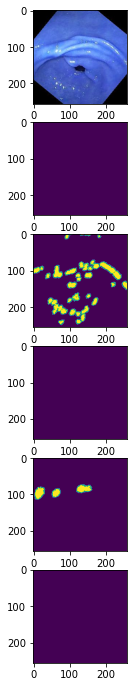

In [7]:
i = r"C:\Users\Akhlaq\PythonProject\test_i\00000_1.jpg"
m = r"C:\Users\Akhlaq\PythonProject\test_m\00000_1.tif"

image = cv2.imread(i, cv2.COLOR_BGR2RGB)
mask = imread(m ,0)

fig = plt.figure(figsize=(12, 12))
plt.subplot(6, 1, 1)
plt.imshow(image)
for img in range(5):
    plt.subplot(6, 1, img+2)
    print(np.unique(mask[img]))
    plt.imshow(mask[img])
plt.show()

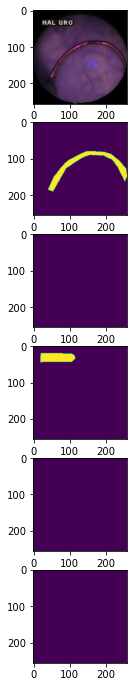

In [8]:
i = r"C:\Users\Akhlaq\PythonProject\kfold_Dataset\images\train\00084_batch2.jpg"
m = r"C:\Users\Akhlaq\PythonProject\kfold_Dataset\masks\train\00084_batch2.tif"


image = cv2.imread(i, cv2.COLOR_BGR2RGB)
mask = imread(m ,0)

fig = plt.figure(figsize=(12, 12))
plt.subplot(6, 1, 1)
plt.imshow(image)
for img in range(5):
    plt.subplot(6, 1, img+2)
    plt.imshow(mask[img])
plt.show()

In [135]:
# image_heavy1, mask_heavy1 = augment(img, mask)
#         image_heavy2, mask_heavy2 = augment(img, mask)
#         image_heavy3, mask_heavy3 = augment(img, mask)
        
# #         print(image_heavy1.shape == (128, 128, 3))
# #         print(mask_heavy1.shape == (128, 128))
        
#         im = cv2.resize(image_heavy1, (256, 256))
#         im = Image.fromarray((im * 255).astype(np.uint8))
#         im.save(os.path.join(aug_img, f"1aug_{n}"))
        
#         im = cv2.resize(mask_heavy1.astype('uint8'), (256, 256))
#         im = Image.fromarray(im)
#         im = ImageOps.grayscale(im)
#         im.save(os.path.join(aug_masks, f"1aug_{os.path.splitext(n)[0]}.png"))
        
#         im = Image.fromarray((image_heavy2 * 255).astype(np.uint8))
#         im.save(os.path.join(aug_img, f"2aug_{n}"))
        
#         im = Image.fromarray(mask_heavy2.astype('uint8'))
#         im = ImageOps.grayscale(im)
#         im.save(os.path.join(aug_masks, f"2aug_{os.path.splitext(n)[0]}.png"))
        
        
#         im = Image.fromarray((image_heavy3 * 255).astype(np.uint8))
#         im.save(os.path.join(aug_img, f"3aug_{n}"))
        
#         im = Image.fromarray(mask_heavy3.astype('uint8'))
#         im = ImageOps.grayscale(im)
#         im.save(os.path.join(aug_masks, f"3aug_{os.path.splitext(n)[0]}.png"))
        
        
        
#         import albumentations as A
# import cv2
# import os
# import glob
# import numpy as np
# from PIL import Image, ImageOps
# from tifffile import imread, imsave, TiffFile
# from matplotlib import pyplot as plt
# import random

In [11]:
def concatenate_masks(mask0, mask1, mask2, mask3, mask4):
    mask0 = np.expand_dims(mask0, axis=0)
    mask1 = np.expand_dims(mask1, axis=0)
    mask2 = np.expand_dims(mask2, axis=0)
    mask3 = np.expand_dims(mask3, axis=0)
    mask4 = np.expand_dims(mask4, axis=0)
    mask = np.concatenate((mask0, mask1, mask2, mask3, mask4), axis=0)
    return mask